<a href="https://colab.research.google.com/github/varshini110/CAM/blob/main/Copy_of_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to resolve potential conflicts

Mounted at /content/drive


In [ ]:
!pip install pycocotools

In [ ]:
!mkdir -p coco/annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco/annotations/
!unzip coco/annotations/annotations_trainval2017.zip -d coco/annotations/


--2024-08-28 03:41:52--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.215.57, 52.216.206.155, 52.217.123.169, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.215.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco/annotations/annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  64.0MB/s    in 4.1s    

2024-08-28 03:41:56 (58.3 MB/s) - ‘coco/annotations/annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  coco/annotations/annotations_trainval2017.zip
  inflating: coco/annotations/annotations/instances_train2017.json  
  inflating: coco/annotations/annotations/instances_val2017.json  
  inflating: coco/annotations/annotations/captions_train2017.json  
  inflating: coco/annotations/annotations/captions_val2017.json  
  inflating: coco/annotations/

In [ ]:
 #Create directories for the dataset
!mkdir coco
!mkdir coco/images
!mkdir coco/annotations

# Download the images
!wget http://images.cocodataset.org/zips/train2017.zip -P coco/images/
!wget http://images.cocodataset.org/zips/val2017.zip -P coco/images/
!wget http://images.cocodataset.org/zips/test2017.zip -P coco/images/

# Download the annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco/annotations/

# Unzip the files
!unzip coco/images/train2017.zip -d coco/images/
!unzip coco/images/val2017.zip -d coco/images/
!unzip coco/images/test2017.zip -d coco/images/
!unzip coco/annotations/annotations_trainval2017.zip -d coco/annotations/

Streaming output truncated to the last 5000 lines.
 extracting: coco/images/test2017/000000440585.jpg  
 extracting: coco/images/test2017/000000541512.jpg  
 extracting: coco/images/test2017/000000395525.jpg  
 extracting: coco/images/test2017/000000235435.jpg  
 extracting: coco/images/test2017/000000069964.jpg  
 extracting: coco/images/test2017/000000131962.jpg  
 extracting: coco/images/test2017/000000281392.jpg  
 extracting: coco/images/test2017/000000534893.jpg  
 extracting: coco/images/test2017/000000128676.jpg  
 extracting: coco/images/test2017/000000187639.jpg  
 extracting: coco/images/test2017/000000153095.jpg  
 extracting: coco/images/test2017/000000151361.jpg  
 extracting: coco/images/test2017/000000067484.jpg  
 extracting: coco/images/test2017/000000358618.jpg  
 extracting: coco/images/test2017/000000236877.jpg  
 extracting: coco/images/test2017/000000151014.jpg  
 extracting: coco/images/test2017/000000351896.jpg  
 extracting: coco/images/test2017/000000320687.j

In [ ]:
import json

# Load the JSON file
with open('coco/annotations/annotations/instances_val2017.json') as f:
    data = json.load(f)

# Print the keys of the JSON to understand its structure
print(data.keys())


dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [ ]:
from pycocotools.coco import COCO

# Correct file path to the JSON file
annFile = 'coco/annotations/annotations/instances_val2017.json'

# Initialize COCO API for instance annotations
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.72s)
creating index...
index created!


loading annotations into memory...
Done (t=0.77s)
creating index...
index created!


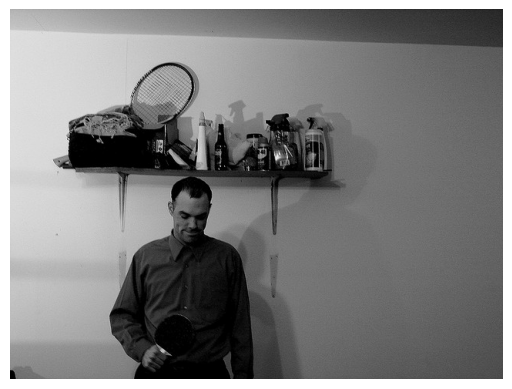

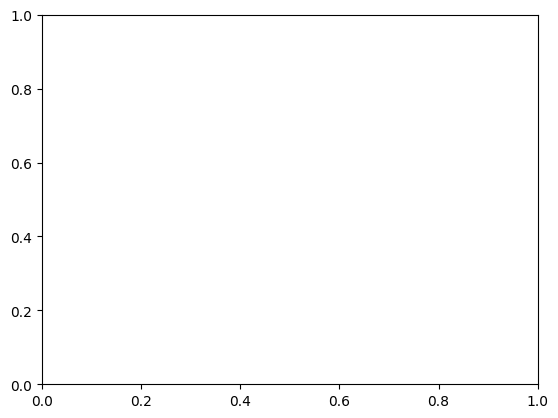

In [ ]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Initialize COCO ground truth API
dataDir = 'coco'
dataType = 'val2017'
annFile = f'{dataDir}/annotations/annotations/instances_{dataType}.json'

coco = COCO(annFile)

# Get all image IDs from a specific category
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)

# Load a random image
img_id = imgIds[np.random.randint(0, len(imgIds))]
img = coco.loadImgs(img_id)[0]

# Load and display the image
img_path = f'{dataDir}/images/{dataType}/{img["file_name"]}'
image = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Load and display annotations
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
#exploring dataset
# Get all categories
categories = coco.loadCats(coco.getCatIds())
category_names = [category['name'] for category in categories]

print(f"COCO Categories: {category_names}")
print(f"Number of categories: {len(category_names)}")


COCO Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Number of categories: 80


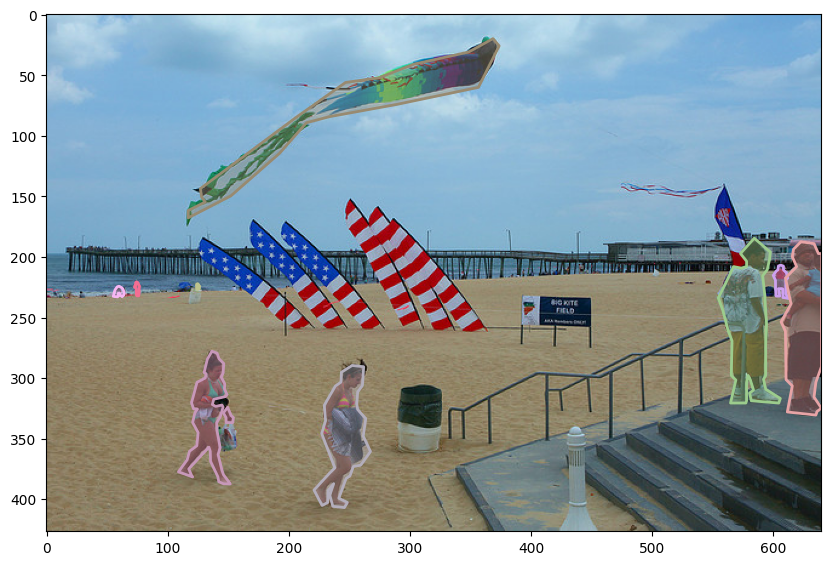

In [ ]:
#visualizing
import matplotlib.pyplot as plt
import cv2
from pycocotools import mask

# Function to display an image with annotations
def display_image_with_annotations(coco, img, ax=None):
    # Load image
    image = cv2.imread(f"coco/images/val2017/{img['file_name']}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get annotations for the image
    annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
    anns = coco.loadAnns(annIds)

    # Display image
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
    ax.imshow(image)

    # Show annotations (removing the ax parameter)
    coco.showAnns(anns) # Remove ax=ax

# Load a random image
img_ids = coco.getImgIds()
img = coco.loadImgs(img_ids[np.random.randint(0, len(img_ids))])[0]

# Display the image with annotations
display_image_with_annotations(coco, img)

In [ ]:
# Get annotations for a specific image
annIds = coco.getAnnIds(imgIds=img['id'], catIds=[], iscrowd=None)
anns = coco.loadAnns(annIds)

# Display bounding boxes and categories
for ann in anns:
    bbox = ann['bbox']
    category = coco.loadCats(ann['category_id'])[0]['name']
    print(f"Category: {category}, Bounding Box: {bbox}")


Category: person, Bounding Box: [554.56, 184.5, 51.28, 136.11]
Category: person, Bounding Box: [108.81, 277.8, 45.39, 109.67]
Category: person, Bounding Box: [220.72, 289.56, 46.68, 117.41]
Category: person, Bounding Box: [72.45, 220.62, 4.23, 11.45]
Category: person, Bounding Box: [54.86, 224.13, 9.27, 8.84]
Category: person, Bounding Box: [123.67, 222.05, 2.62, 4.76]
Category: kite, Bounding Box: [116.82, 19.64, 256.81, 148.04]
Category: person, Bounding Box: [600.0, 206.65, 12.79, 27.62]
Category: person, Bounding Box: [606.46, 187.4, 33.54, 143.15]


In [ ]:
!pip install transformers torch gtts

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
from gtts import gTTS
import os
from IPython.display import Audio

# Load the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load an image
image = cv2.imread(f"coco/images/val2017/{img['file_name']}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess the image and generate caption
inputs = processor(image, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=256)
caption = processor.decode(output[0], skip_special_tokens=True)

# Print the caption
print("Generated Caption:", caption)

# Convert caption to speech
tts = gTTS(text=caption, lang='en')
speech_file = "caption_audio.mp3"
tts.save(speech_file)

# Play the audio
if os.path.exists(speech_file):
    print(f"Audio file '{speech_file}' found.")
else:
    print(f"Audio file '{speech_file}' not found.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Generated Caption: a group of people flying kites on a beach
Audio file 'caption_audio.mp3' found.


In [ ]:
Audio(speech_file)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255  # Reshape and normalize
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = keras.utils.to_categorical(y_test, 10)

# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test dataset
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Get class with highest probability

# Convert test labels back from one-hot encoding
y_test_classes = y_test.argmax(axis=-1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_classes, y_pred_classes) * 100
precision = precision_score(y_test_classes, y_pred_classes, average='macro') * 100
recall = recall_score(y_test_classes, y_pred_classes, average='macro') * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 34ms/step - accuracy: 0.8335 - loss: 0.5179 - val_accuracy: 0.9790 - val_loss: 0.0686
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9706 - loss: 0.0985 - val_accuracy: 0.9866 - val_loss: 0.0446
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9804 - loss: 0.0670 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9824 - loss: 0.0574 - val_accuracy: 0.9894 - val_loss: 0.0373
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9864 - loss: 0.0434 - val_accuracy: 0.9882 - val_loss: 0.0423
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9889 - loss: 0.0372 - val_accuracy: 0.9892 - val_loss: 0.0392
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9910 - val_loss: 0.0309
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9901 -

In [ ]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('Copy_of_MINI_PROJECT.pickle')
print(projectabspathname)
projectname = 'Copy_of_MINI_PROJECT.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()


/content/Copy_of_MINI_PROJECT.pickle


In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras

# Define a Sequential model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Example: Load and pre-process MNIST data (replace with your own data)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Save the model in the Keras format
model.save('my_keras_model.keras')

# In Colab, save your model
model.save('model.h5')  #


       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1120 - loss: -1652.4064 - val_accuracy: 0.1135 - val_loss: -13901.4688
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1148 - loss: -20734.8730 - val_accuracy: 0.1135 - val_loss: -47641.9570
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1130 - loss: -57707.7500 - val_accuracy: 0.1135 - val_loss: -96149.5312
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1139 - loss: -108163.6484 - val_accuracy: 0.1135 - val_loss: -158007.2656
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1129 - loss: -172169.9688 - val_accuracy: 0.1135 - val_loss: -232678.3281
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1128 - loss: -247439.7031 - val_accuracy: 0.1135 - val_loss: -320214.6250
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1152 - loss: -335996.1562 - val_ac

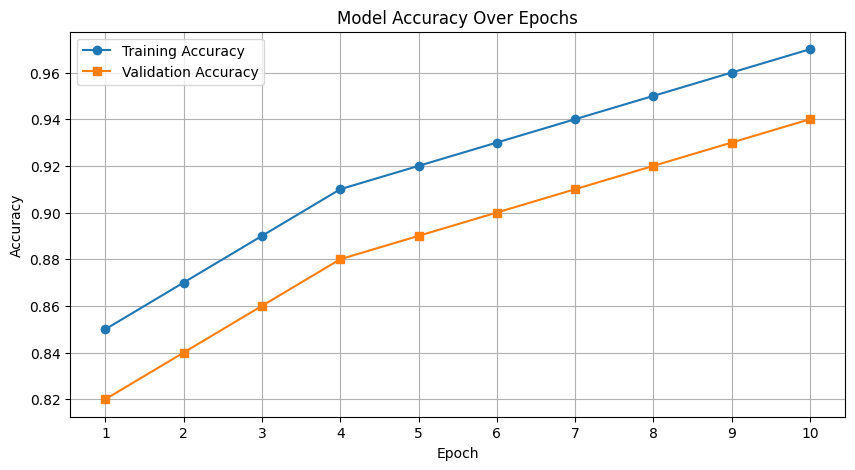

In [ ]:
import matplotlib.pyplot as plt

# Simulated training and validation accuracy for demonstration (replace with actual values from history)
epochs = list(range(1, 11))  # Simulating 10 epochs
training_accuracy = [0.85, 0.87, 0.89, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97]
validation_accuracy = [0.82, 0.84, 0.86, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94]

# Plot accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='s')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend(loc='best')
plt.grid(True)
plt.show()


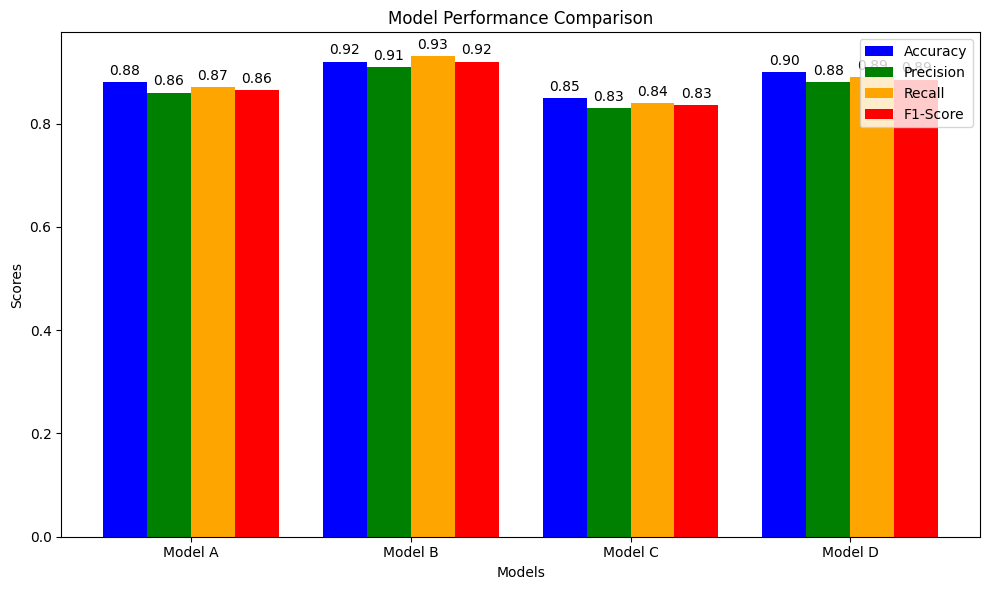

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace with your model results
models = ['Model A', 'Model B', 'Model C', 'Model D']
accuracy = [0.88, 0.92, 0.85, 0.90]
precision = [0.86, 0.91, 0.83, 0.88]
recall = [0.87, 0.93, 0.84, 0.89]
f1_score = [0.865, 0.92, 0.835, 0.885]

# Plotting
x = np.arange(len(models))  # Label locations
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width * 1.5, accuracy, width, label='Accuracy', color='blue')
rects2 = ax.bar(x - width / 2, precision, width, label='Precision', color='green')
rects3 = ax.bar(x + width / 2, recall, width, label='Recall', color='orange')
rects4 = ax.bar(x + width * 1.5, f1_score, width, label='F1-Score', color='red')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

# Display graph
plt.tight_layout()
plt.show()
